___
# NOTE: This is still a work in progress.  There is much explanation and details that still need to be added.  
___

# Linear Regression
## Assumptions
1. Linear in parameters: in the population, the relationship between y/dependent & the explanatory/independent variables is linear
2. Random Sampling: the data is a random sample drawn from the population.  
3. No Perfect Colinearity: in the sample, and therefore the population, none of the independent variables are constant and there are no exact relationships between any two independent variables
4. Zero Conditional Mean: the value of the explanatory/independent variables must not contain any information about the mean of the ubobserved factors (ex: endogenous variables)
\begin{equation*}
E(u_i|x_i) =  0
\end{equation*}
5. Heteroskedasticity 
6. The coeficients are normally distributed
___
## Key Formulas
Variance
\begin{equation*}
Var(\hat B_j) = \frac{\hat\sigma^2}{\sum_{j=1}^n (x_j - \bar x)^2 * (1-R_j^2)}
\end{equation*}
Standard Error
\begin{equation*}
se(\hat B_j) = \sqrt{Var(\hat B_j)}
\end{equation*}

T-Statistic
\begin{equation*}
t_\hat B = \frac{\hat B_j - B_j}{se(\hat B_j)}
\end{equation*}

One Sided T-Test
\begin{equation*}
H_0 : B_j = 0
\end{equation*}
\begin{equation*}
H_1 : B_j > 0
\end{equation*}

Two Sided T-Test
\begin{equation*}
H_0 : B_j = 0
\end{equation*}
\begin{equation*}
H_1 : B_j \neq 0
\end{equation*}

>Note: These equations may not render correctly on GitHub, but will show the equations properly in a Jupyter Notebook.  I recomend downloading the [Anaconda](https://www.anaconda.com/download/) version of Python that includes Jupyter and most of the packages you would need to run this notebook.  

___
# Dataset

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
X = boston.data
y = boston.target

In [6]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Distribution of Dependent Variable

In [3]:
# Plotting Tools
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns

# I'm going to suppress the warnings here, because of a deprecation warning 
# currently coming from the up-to-date version of Seaborn
import warnings
warnings.filterwarnings("ignore")

In [28]:
def check_normality(data, alpha=1e-3):
    k2, p = normaltest(data)
    print(f'p = {p}')
    if p < alpha:
        print('Reject Ho: (Data not normally distributed)')
    else:
        print('Fail to reject Ho: (Data might be normal distributed)')

p = 1.7583188871696095e-20
Reject Ho: (Data not normally distributed)


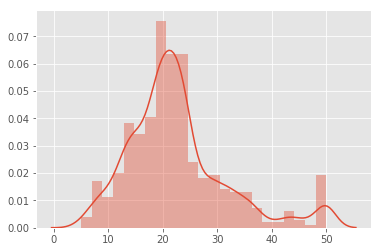

In [31]:
from scipy.stats import normaltest
check_normality(y)
sns.distplot(y)
plt.show()

## Logrithmic Transformation of Dependent Variable

p = 0.00018245472768345196
Reject Ho: (Data not normally distributed)


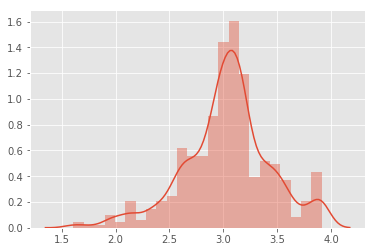

In [32]:
import numpy as np
check_normality(np.log(y))
sns.distplot(np.log(y))
plt.show()

### Distribution of Independent Variables

In [35]:
X.shape

(506, 13)

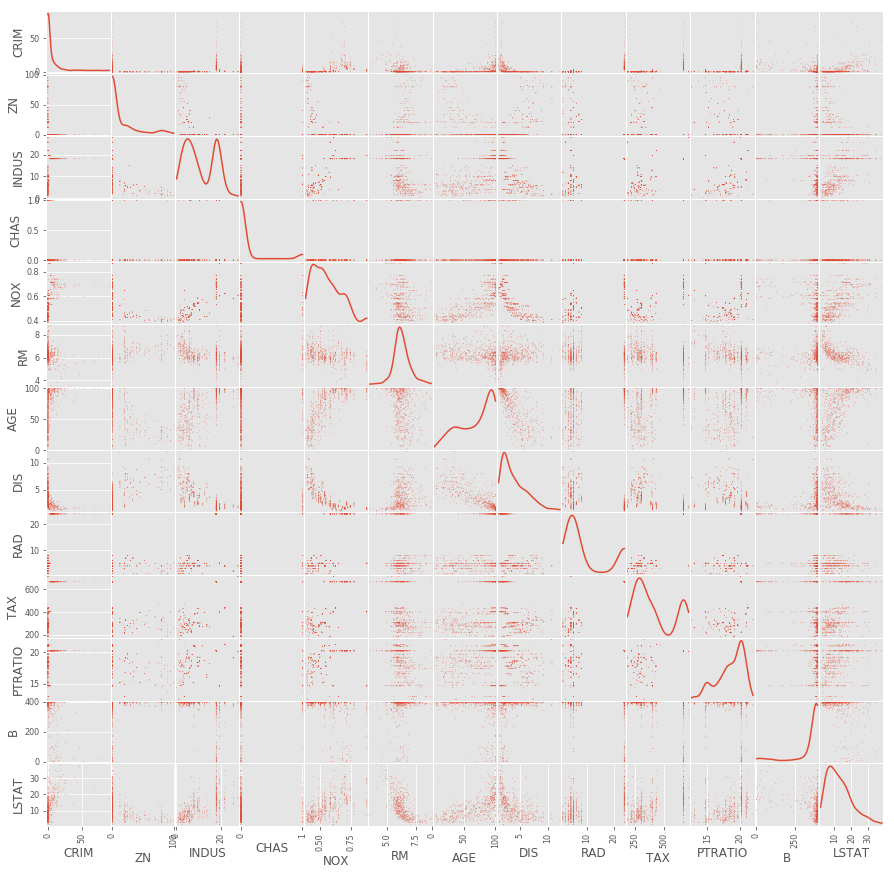

In [20]:
import pandas as pd
from pandas.plotting import scatter_matrix
df_X = pd.DataFrame(X, columns=boston.feature_names)
_ = scatter_matrix(df_X, 
                   alpha=0.8,
                   figsize=(15,15), 
                   diagonal='kde',
                   grid=True,
                   s=2)

In [37]:
df_X.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [38]:
df_X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


CRIM
p = 3.762667990682214e-123
Reject Ho: (Data not normally distributed)


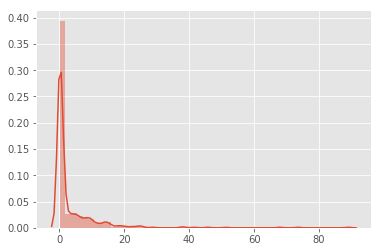

----------------------------------------------------------------------------------------------------
ZN
p = 2.702371210664229e-50
Reject Ho: (Data not normally distributed)


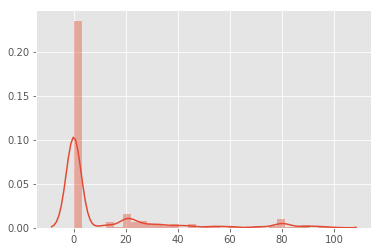

----------------------------------------------------------------------------------------------------
INDUS
p = 5.989300492035289e-92
Reject Ho: (Data not normally distributed)


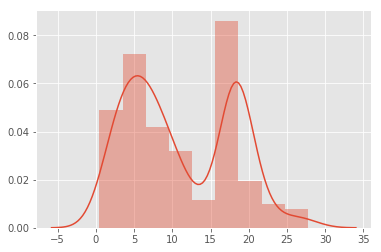

----------------------------------------------------------------------------------------------------
CHAS
p = 1.8159208966209064e-80
Reject Ho: (Data not normally distributed)


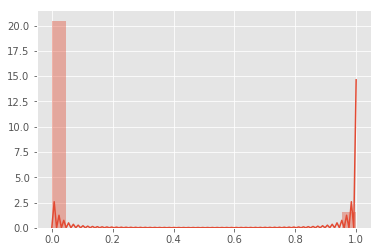

----------------------------------------------------------------------------------------------------
NOX
p = 7.159366727337585e-09
Reject Ho: (Data not normally distributed)


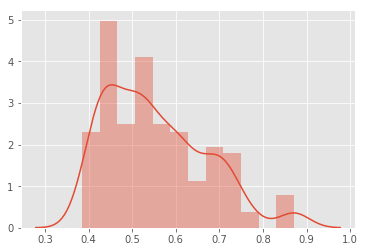

----------------------------------------------------------------------------------------------------
RM
p = 5.90260814347777e-09
Reject Ho: (Data not normally distributed)


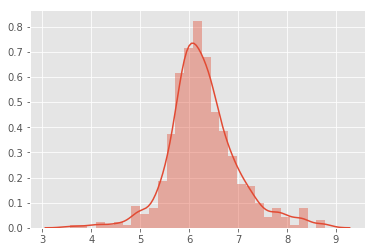

----------------------------------------------------------------------------------------------------
AGE
p = 1.6191768966045395e-25
Reject Ho: (Data not normally distributed)


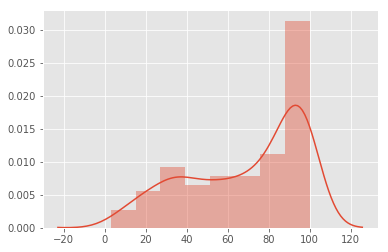

----------------------------------------------------------------------------------------------------
DIS
p = 2.904508639715488e-15
Reject Ho: (Data not normally distributed)


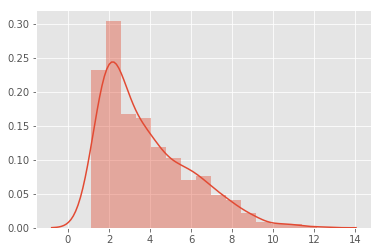

----------------------------------------------------------------------------------------------------
RAD
p = 4.034963327111422e-26
Reject Ho: (Data not normally distributed)


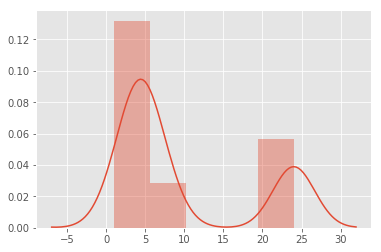

----------------------------------------------------------------------------------------------------
TAX
p = 1.0345186873914037e-55
Reject Ho: (Data not normally distributed)


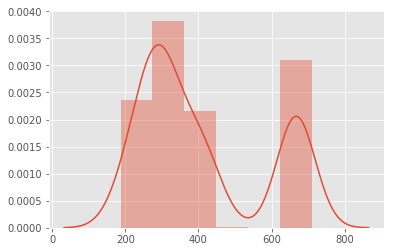

----------------------------------------------------------------------------------------------------
PTRATIO
p = 1.0548195349963486e-10
Reject Ho: (Data not normally distributed)


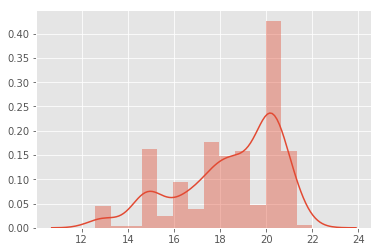

----------------------------------------------------------------------------------------------------
B
p = 1.5648726518664377e-68
Reject Ho: (Data not normally distributed)


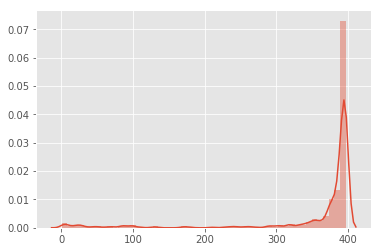

----------------------------------------------------------------------------------------------------
LSTAT
p = 3.7806593212903944e-13
Reject Ho: (Data not normally distributed)


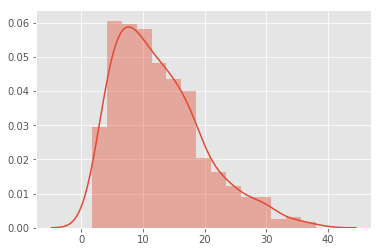

----------------------------------------------------------------------------------------------------


In [41]:
for i in range(X.shape[1]):
    print(boston.feature_names[i])
    check_normality(X[:,i])
    sns.distplot(X[:,i])
    plt.show()
    print('-'*100)

## Correlation with the Dependent Variable

CRIM


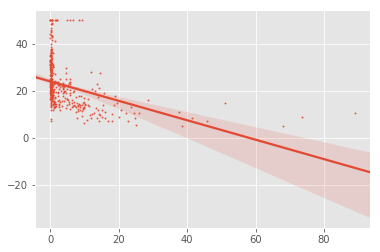

----------------------------------------------------------------------------------------------------
ZN


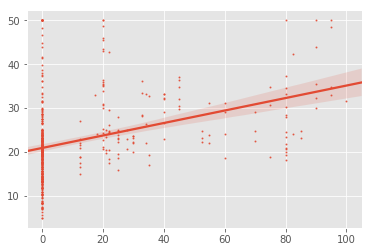

----------------------------------------------------------------------------------------------------
INDUS


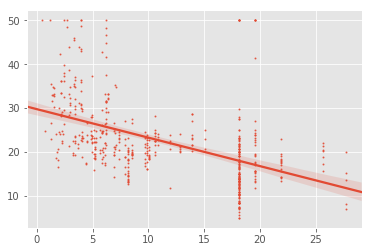

----------------------------------------------------------------------------------------------------
CHAS


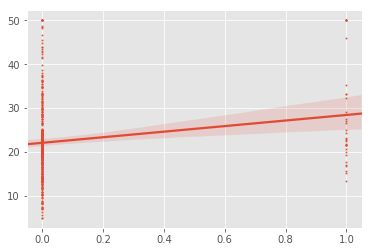

----------------------------------------------------------------------------------------------------
NOX


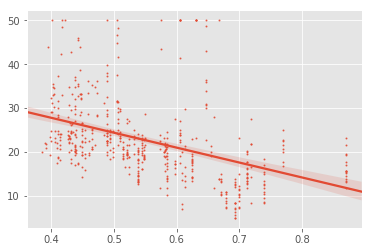

----------------------------------------------------------------------------------------------------
RM


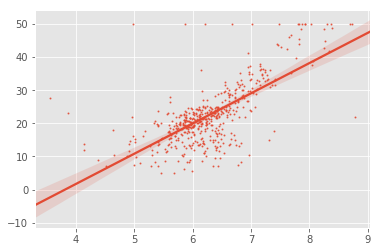

----------------------------------------------------------------------------------------------------
AGE


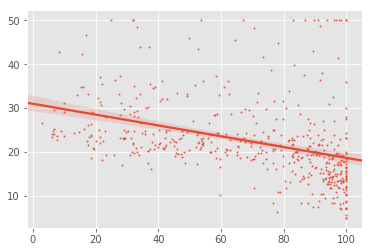

----------------------------------------------------------------------------------------------------
DIS


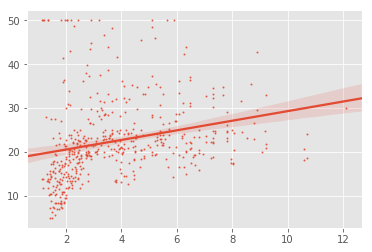

----------------------------------------------------------------------------------------------------
RAD


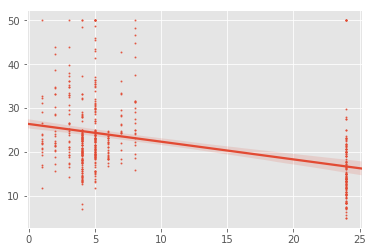

----------------------------------------------------------------------------------------------------
TAX


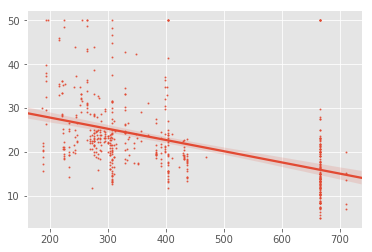

----------------------------------------------------------------------------------------------------
PTRATIO


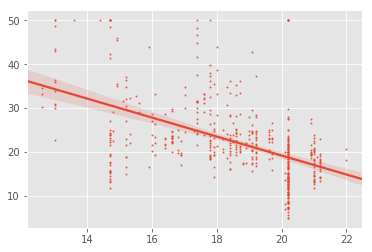

----------------------------------------------------------------------------------------------------
B


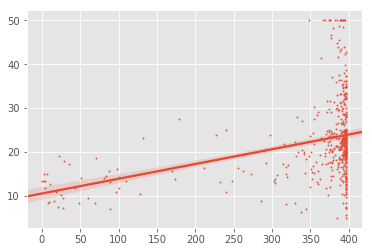

----------------------------------------------------------------------------------------------------
LSTAT


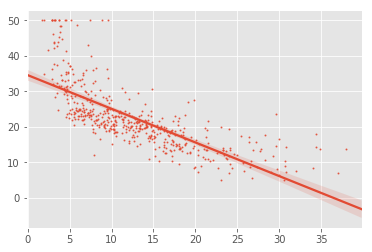

----------------------------------------------------------------------------------------------------


In [42]:
for i in range(X.shape[1]):
    print(boston.feature_names[i])
    sns.regplot(x=X[:,i], y=y, scatter_kws={'s':1, 'alpha':0.8})
    plt.show()
    print('-'*100)

___
## Regression with Intercept Added

In [47]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn import metrics

# Add constant (intercept) 
df_X_c = sm.add_constant(df_X)
model = OLS(y, df_X_c, hasconst=True).fit()
print(model.summary())
print('-'*100)
# Hand Calculate Statistics
Xc = df_X_c.as_matrix()
predictions = model.predict(Xc)

n, model_df = Xc.shape
resid_df = n - model_df
rss = np.sum((y - predictions)**2)
tss = np.sum((y - y.mean())**2)
se_reg = np.sqrt(rss/resid_df)
log_likeR = (-n/2) * (np.log(2*np.pi) + (np.log(rss/n)+1))
r2 = 1- (rss/tss)
adj_r2 = 1- ((1/resid_df)*rss)/((1/resid_df)*tss)
aic = -2 * log_likeR + 2 * model_df
if log_likeR > 0:
    sic = -2 * np.log(np.abs(log_likeR)) + np.log(n) * model_df
else:
    sic = aic
tss_2 = (y **2).sum()
r2_2 = 1- (rss/tss_2)
print(f'N Observations:          \t{n}')
print(f'Model D.F.:              \t{model_df}')
print(f'Residual D.F.:           \t{resid_df}')
print(f'Residual Sum of Squares: \t{rss}')
print(f'Std. Err. of Regression: \t{se_reg}')
print(f'Log Likelihood:          \t{log_likeR}')
print(f'R Squared:               \t{r2}')
print(f'Adjusted R Squared:      \t{r2}')
print(f'A.I.C.:                  \t{aic} ')
print(f'S.I.C.:                  \t{sic}')
print(f'R Squared (no itcp):     \t{r2_2}')
print('='*50)  # SKLearn Metrics
print(f'Mean Square Error:       \t{metrics.mean_squared_error(y, predictions)}')
print(f'Explained Variance:      \t{metrics.explained_variance_score(y, predictions)}')
print(f'Mean Abs Error:          \t{metrics.mean_absolute_error(y, predictions)}')
print(f'Median Abs Error:        \t{metrics.median_absolute_error(y, predictions)}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 13 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        10:20:42   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.0

___
## Without Intercept

In [49]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn import metrics

# Add constant (intercept) 
model = OLS(y, df_X, hasconst=False).fit()
print(model.summary())
print('-'*100)
# Hand Calculate Statistics
predictions = model.predict(X)

n, model_df = X.shape
resid_df = n - model_df
rss = np.sum((y - predictions)**2)
tss = np.sum((y - y.mean())**2)
se_reg = np.sqrt(rss/resid_df)
log_likeR = (-n/2) * (np.log(2*np.pi) + (np.log(rss/n)+1))
r2 = 1- (rss/tss)
adj_r2 = 1- ((1/resid_df)*rss)/((1/resid_df)*tss)
aic = -2 * log_likeR + 2 * model_df
if log_likeR > 0:
    sic = -2 * np.log(np.abs(log_likeR)) + np.log(n) * model_df
else:
    sic = aic
tss_2 = (y **2).sum()
r2_2 = 1- (rss/tss_2)
print(f'N Observations:          \t{n}')
print(f'Model D.F.:              \t{model_df}')
print(f'Residual D.F.:           \t{resid_df}')
print(f'Residual Sum of Squares: \t{rss}')
print(f'Std. Err. of Regression: \t{se_reg}')
print(f'Log Likelihood:          \t{log_likeR}')
print(f'R Squared:               \t{r2}')
print(f'Adjusted R Squared:      \t{r2}')
print(f'A.I.C.:                  \t{aic} ')
print(f'S.I.C.:                  \t{sic}')
print(f'R Squared (no itcp):     \t{r2_2}')
print('='*50)  # SKLearn Metrics
print(f'Mean Square Error:       \t{metrics.mean_squared_error(y, predictions)}')
print(f'Explained Variance:      \t{metrics.explained_variance_score(y, predictions)}')
print(f'Mean Abs Error:          \t{metrics.mean_absolute_error(y, predictions)}')
print(f'Median Abs Error:        \t{metrics.median_absolute_error(y, predictions)}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.1
Date:                Fri, 13 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:22:49   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3129.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0916      0.034     -2.675      0.0

## Look at Covariance of Independent Variables

In [53]:
# Export as Excel File.  Use absolute value of correlation coeficient
df_X.corr().apply(np.abs).to_csv('colinearity_check.csv')

![Image Link](lr_cov_screenshot.png)

If we were attempting to use our regression to understand the impact of these independent variables on the dependent variable, we might need to look at removing some of the highly covariant variables.

## Look at Non-Linear & Interaction Features
First we create the interaction and squared terms using the PolynomialFeatures tool in scikit learn.   

In [111]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=True)
X2 = pf.fit_transform(df_X)

# Correct the feature names
columns = list(df_X.columns.values)
variables = {f'x{x}': columns[x] for x in range(len(columns))}
feature_names = [1]
for feature in pf.get_feature_names()[1:]:
    if '^2' in feature:
        parts = feature.split('^')
        feature_names.append(variables[parts[0]]+'^2')
    else:
        parts = feature.split(' ')
        if len(parts)==1 and feature in variables.keys():
            feature_names.append(variables[feature])
        else:
            feature_names.append(variables[parts[0]]+' '+variables[parts[1]])
df_X_2 = pd.DataFrame(X2, columns=feature_names)

In [112]:
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from sklearn import metrics

# Add constant (intercept) 
df_X_c2 = sm.add_constant(df_X_2)
model = OLS(y, df_X_c2, hasconst=True).fit()
print(model.summary())
print('-'*100)
# Hand Calculate Statistics
Xc = df_X_c2.as_matrix()
predictions = model.predict(Xc)

n, model_df = Xc.shape
resid_df = n - model_df
rss = np.sum((y - predictions)**2)
tss = np.sum((y - y.mean())**2)
se_reg = np.sqrt(rss/resid_df)
log_likeR = (-n/2) * (np.log(2*np.pi) + (np.log(rss/n)+1))
r2 = 1- (rss/tss)
adj_r2 = 1- ((1/resid_df)*rss)/((1/resid_df)*tss)
aic = -2 * log_likeR + 2 * model_df
if log_likeR > 0:
    sic = -2 * np.log(np.abs(log_likeR)) + np.log(n) * model_df
else:
    sic = aic
tss_2 = (y **2).sum()
r2_2 = 1- (rss/tss_2)
print(f'N Observations:          \t{n}')
print(f'Model D.F.:              \t{model_df}')
print(f'Residual D.F.:           \t{resid_df}')
print(f'Residual Sum of Squares: \t{rss}')
print(f'Std. Err. of Regression: \t{se_reg}')
print(f'Log Likelihood:          \t{log_likeR}')
print(f'R Squared:               \t{r2}')
print(f'Adjusted R Squared:      \t{r2}')
print(f'A.I.C.:                  \t{aic} ')
print(f'S.I.C.:                  \t{sic}')
print(f'R Squared (no itcp):     \t{r2_2}')
print('='*50)  # SKLearn Metrics
print(f'Mean Square Error:       \t{metrics.mean_squared_error(y, predictions)}')
print(f'Explained Variance:      \t{metrics.explained_variance_score(y, predictions)}')
print(f'Mean Abs Error:          \t{metrics.mean_absolute_error(y, predictions)}')
print(f'Median Abs Error:        \t{metrics.median_absolute_error(y, predictions)}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     51.18
Date:                Fri, 13 Jul 2018   Prob (F-statistic):          7.82e-180
Time:                        11:41:02   Log-Likelihood:                -1170.5
No. Observations:                 506   AIC:                             2549.
Df Residuals:                     402   BIC:                             2989.
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
1              -179.1844     85.103     -2.105

## Lasso Regression - Look at what coeficients we need to keep

In [116]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso

X = df_X_2.drop(columns=[1]).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
parameters = {'fit_intercept': [True, False], 'alpha': np.linspace(0, 10, num=20), 'max_iter': [1000]}
lasso = Lasso()
clf = GridSearchCV(estimator=lasso, param_grid=parameters, n_jobs=2)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_estimator_)

{'alpha': 0.5263157894736842, 'fit_intercept': False, 'max_iter': 1000}
Lasso(alpha=0.5263157894736842, copy_X=True, fit_intercept=False,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [118]:
alpha = 0.53
fit_intercept = False
max_iter = 1500

lasso = Lasso(alpha=alpha, fit_intercept=fit_intercept, max_iter=max_iter)
lasso.fit(X_train, y_train)
predictions = lasso.predict(X_test)

# calculate statistics
n, model_df = df_X_2.drop(columns=[1]).shape
resid_df = n - model_df
rss = np.sum((y_test - predictions)**2)
tss = np.sum((y_test - y_test.mean())**2)
se_reg = np.sqrt(rss/resid_df)
log_likeR = (-n/2) * (np.log(2*np.pi) + (np.log(rss/n)+1))
r2 = 1- (rss/tss)
adj_r2 = 1- ((1/resid_df)*rss)/((1/resid_df)*tss)
aic = -2 * log_likeR + 2 * model_df
if log_likeR > 0:
    sic = -2 * np.log(np.abs(log_likeR)) + np.log(n) * model_df
else:
    sic = aic
tss_2 = (y_train **2).sum()
r2_2 = 1- (rss/tss_2)

# AJ Calculated Metrics
print(f'N Observations:          \t{n}')
print(f'Model D.F.:              \t{model_df}')
print(f'Residual D.F.:           \t{resid_df}')
print(f'Residual Sum of Squares: \t{rss}')
print(f'Std. Err. of Regression: \t{se_reg}')
print(f'Log Likelihood:          \t{log_likeR}')
print(f'R Squared:               \t{r2}')
print(f'Adjusted R Squared:      \t{r2}')
print(f'A.I.C.:                  \t{aic} ')
print(f'S.I.C.:                  \t{sic}')
print(f'R Squared (no itcp):     \t{r2_2}')
print('='*50)  # SKLearn Metrics
print(f'Mean Square Error:       \t{metrics.mean_squared_error(y_test, predictions)}')
print(f'Explained Variance:      \t{metrics.explained_variance_score(y_test, predictions)}')
print(f'Mean Abs Error:          \t{metrics.mean_absolute_error(y_test, predictions)}')
print(f'Median Abs Error:        \t{metrics.median_absolute_error(y_test, predictions)}')
print('='*50)
print(f'Intercept:               \t{lasso.intercept_}')
print('='*50)
# Value of Coeficients
coef_df = pd.DataFrame([x for x in zip(df_X_2.drop(columns=[1]), lasso.coef_)],
                       columns = ['Variable','coef']).set_index('Variable')
coef_df['coef_abs'] = coef_df.coef.apply(np.abs)
coef_df = coef_df.sort_values(by='coef_abs', ascending=False)
print('-'*100)
print("Top 50 Coeficients")
print(coef_df.head(n=50))
print('-'*100)
print('Bottom 50 Coeficients')
print(coef_df.tail(n=50))

N Observations:          	506
Model D.F.:              	104
Residual D.F.:           	402
Residual Sum of Squares: 	2056.8633970462956
Std. Err. of Regression: 	2.261984883800735
Log Likelihood:          	-1072.7903025633188
R Squared:               	0.8501528450795521
Adjusted R Squared:      	0.8501528450795521
A.I.C.:                  	2353.5806051266377 
S.I.C.:                  	2353.5806051266377
R Squared (no itcp):     	0.9898594021587631
Mean Square Error:       	13.531996033199313
Explained Variance:      	0.8502588485596625
Mean Abs Error:          	2.488587343950148
Median Abs Error:        	1.8611614017284577
Intercept:               	0.0
----------------------------------------------------------------------------------------------------
Top 50 Coeficients
                   coef  coef_abs
Variable                         
RM^2           0.479633  0.479633
AGE            0.390047  0.390047
RM RAD        -0.177149  0.177149
RM LSTAT      -0.088270  0.088270
INDUS RAD     -0

## Linreg with top 20 Variables

In [120]:
top_20_vars = ['RM^2', 'AGE', 'RM RAD', 'RM LSTAT', 'INDUS RAD', 'DIS^2', 'CRIM RAD', 'RAD PTRATIO', 'NOX TAX', 
               'INDUS LSTAT', 'INDUS^2', 'INDUS PTRATIO', 'CRIM INDUS', 'RAD LSTAT', 'LSTAT^2', 'ZN RM', 'DIS RAD', 
               'TAX', 'RM AGE', 'PTRATIO LSTAT',]

model = OLS(y, df_X_2[top_20_vars], hasconst=False).fit()
print(model.summary())
print('-'*100)
# Hand Calculate Statistics
predictions = model.predict(df_X_2[top_20_vars])

n, model_df = df_X_2[top_20_vars].shape
resid_df = n - model_df
rss = np.sum((y - predictions)**2)
tss = np.sum((y - y.mean())**2)
se_reg = np.sqrt(rss/resid_df)
log_likeR = (-n/2) * (np.log(2*np.pi) + (np.log(rss/n)+1))
r2 = 1- (rss/tss)
adj_r2 = 1- ((1/resid_df)*rss)/((1/resid_df)*tss)
aic = -2 * log_likeR + 2 * model_df
if log_likeR > 0:
    sic = -2 * np.log(np.abs(log_likeR)) + np.log(n) * model_df
else:
    sic = aic
tss_2 = (y **2).sum()
r2_2 = 1- (rss/tss_2)
print(f'N Observations:          \t{n}')
print(f'Model D.F.:              \t{model_df}')
print(f'Residual D.F.:           \t{resid_df}')
print(f'Residual Sum of Squares: \t{rss}')
print(f'Std. Err. of Regression: \t{se_reg}')
print(f'Log Likelihood:          \t{log_likeR}')
print(f'R Squared:               \t{r2}')
print(f'Adjusted R Squared:      \t{r2}')
print(f'A.I.C.:                  \t{aic} ')
print(f'S.I.C.:                  \t{sic}')
print(f'R Squared (no itcp):     \t{r2_2}')
print('='*50)  # SKLearn Metrics
print(f'Mean Square Error:       \t{metrics.mean_squared_error(y, predictions)}')
print(f'Explained Variance:      \t{metrics.explained_variance_score(y, predictions)}')
print(f'Mean Abs Error:          \t{metrics.mean_absolute_error(y, predictions)}')
print(f'Median Abs Error:        \t{metrics.median_absolute_error(y, predictions)}')

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1084.
Date:                Fri, 13 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:52:45   Log-Likelihood:                -1366.7
No. Observations:                 506   AIC:                             2773.
Df Residuals:                     486   BIC:                             2858.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
RM^2              0.8784      0.028     31.012

## Results
With a relatively small set of features we have a much more accurate model than the original regression on the base data.  There is still plenty of room to improve the model, but it is coming along nicely.  

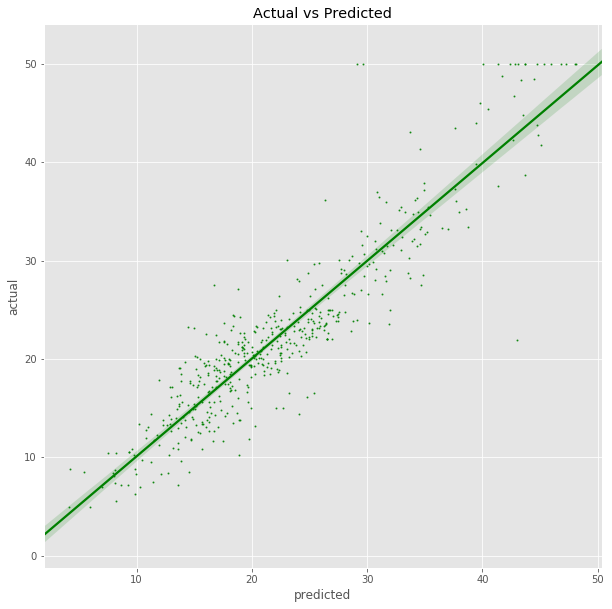

In [133]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x='predicted', 
            y='actual', 
            data=pd.DataFrame([x for x in zip(y, predictions)], columns=['actual', 'predicted']),
            scatter_kws={'s':1, 'alpha':0.8},
            color='green',
            ax=ax)
plt.title('Actual vs Predicted')
plt.show()